In [12]:

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
opt.buttons = [
    "copy",
    {
        "extend": "csvHtml5",
        "text": "CSV",          
        "fieldBoundary": "",     
        "extension": ".csv"      
    },
    "excel",
    "pdf"
]

opt.classes = ["display", "nowrap"]
opt.scrollY = "400px"       
opt.scrollCollapse = True   
opt.scrollX = True         
opt.paging = False

In [2]:
import os
import sys
from IPython.display import display, Markdown
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


#.experimentsv2 import Experiment
root_path = os.path.abspath("..")  
if root_path not in sys.path:
    sys.path.insert(0, root_path)
os.chdir("..")
from experiments.experiments import Experiment
from config.constants import ACTIVITY_LABELS
X_final_550=pd.read_csv('X_final_550.csv')

In [ ]:

df_subset = X_final_550[X_final_550['activity'] <= 7].copy()
y = df_subset['activity'].values 
subjects = df_subset['participant_id'].values 
cols_to_drop = ['activity', 'participant_id', 'window_id', 'aligned_window_id', 'Unnamed: 0']
drop_actual = [c for c in cols_to_drop if c in df_subset.columns]
X = df_subset.drop(columns=drop_actual).values  

scaler = StandardScaler()
models = {
    "OneR": DecisionTreeClassifier(),
}
model_parameters = {
    "OneR": {"max_depth": [1]},
}



display(Markdown("## Exercise 3.1 - Baseline"))
display(Markdown("### Train-only"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,cms, cm_total=exp.run_train_only()
display(results[["Model", "Accuracy", "Precision", "Recall", "F1"]])
display(pd.DataFrame(cm_total))

display(Markdown("### TT 70-30"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,cms, cm_total=exp.run_train_test(0.3)
display(results[["Model", "Accuracy", "Precision", "Recall", "F1"]])
display(pd.DataFrame(cm_total))


display(Markdown("### 1x10-fold cross-validation"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
experiments,cms_stats = exp.run_cross_validation(n_splits=10, n_repeats=1)
display(experiments)



## Exercise 3.1 - Baseline

### Train-only

15 participantes detectados.
Scaler detetado: StandardScaler


Model  Accuracy  Precision    Recall        F1
0  OneR  0.389975   0.172083  0.283232  0.195286

0  1  2  3     4  5  6
0  2431  0  0  0     4  0  0
1     0  0  0  0  1503  0  0
2     0  0  0  0  1340  0  0
3    31  0  0  0  2283  0  0
4    37  0  0  0  2315  0  0
5    15  0  0  0  1501  0  0
6     6  0  0  0   704  0  0

### TT 70-30

15 participantes detectados.
Scaler detetado: StandardScaler
Treinando OneR {'max_depth': 1} (Epochs=None)...


Model  Accuracy  Precision    Recall        F1
0  OneR  0.384337   0.170797  0.283403  0.194161

0  1  2  3    4  5  6
0  710  0  0  0    0  0  0
1    0  0  0  0  433  0  0
2    0  0  0  0  433  0  0
3   12  0  0  0  675  0  0
4   11  0  0  0  669  0  0
5    6  0  0  0  426  0  0
6    0  0  0  0  213  0  0

### 1x10-fold cross-validation

15 participantes detectados.
Scaler detetado: StandardScaler


#### 10x10-fold cross-validation

Model  max_depth  Accuracy_Mean  Accuracy_Std  Recall_Mean  Recall_Std  \
0  OneR          1       0.386799      0.016254     0.287774    0.015381   

   Precision_Mean  Precision_Std   F1_Mean   F1_Std  
0         0.18808       0.048485  0.208763  0.04158

In [13]:
display(Markdown("## Exercise 3.2 - KNN capabilities"))
display(Markdown("### Exercise 3.2.1 - Train-only, TT 70-30 e 10x10-fold cross-validation (10CV)"))

scaler = StandardScaler()
models = {
    "knn": KNeighborsClassifier(),
}
model_parameters = {
    "knn": {"n_neighbors": [1]},
}

display(Markdown("#### Train-only"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,cms, cm_total=exp.run_train_only()
display(results[["Model", "n_neighbors", "Accuracy", "Precision", "Recall", "F1"]])
display(pd.DataFrame(cm_total))

display(Markdown("#### TT 70-30"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,cms, cm_total=exp.run_train_test(0.3)
display(results[["Model", "n_neighbors", "Accuracy", "Precision", "Recall", "F1"]])
display(pd.DataFrame(cm_total))

display(Markdown("#### 10CV"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,cms_stats = exp.run_cross_validation(n_splits=10, n_repeats=1)
display(results)





## Exercise 3.2 - KNN capabilities

### Exercise 3.2.1 - Train-only, TT 70-30 e 10x10-fold cross-validation (10CV)

#### Train-only

15 participantes detectados.
Scaler detetado: StandardScaler


Model  n_neighbors  Accuracy  Precision  Recall   F1
0   knn            1       1.0        1.0     1.0  1.0

0     1     2     3     4     5    6
0  2435     0     0     0     0     0    0
1     0  1503     0     0     0     0    0
2     0     0  1340     0     0     0    0
3     0     0     0  2314     0     0    0
4     0     0     0     0  2352     0    0
5     0     0     0     0     0  1516    0
6     0     0     0     0     0     0  710

#### TT 70-30

15 participantes detectados.
Scaler detetado: StandardScaler
Treinando knn {'n_neighbors': 1} (Epochs=None)...


Model  n_neighbors  Accuracy  Precision    Recall        F1
0   knn            1  0.622352   0.597131  0.580018  0.581317

0    1    2    3    4    5   6
0  704    3    1    1    1    0   0
1    1  211  221    0    0    0   0
2    3   97  333    0    0    0   0
3   11    0    0  372  292    8   4
4    9    0    0  370  294    5   2
5    0    0    0   58   21  277  76
6    0    0    0   32   24  115  42

#### 10CV

15 participantes detectados.
Scaler detetado: StandardScaler


Model  n_neighbors  Accuracy_Mean  Accuracy_Std  Recall_Mean  Recall_Std  \
0   knn            1       0.666438      0.108882     0.598551    0.029077   

   Precision_Mean  Precision_Std   F1_Mean   F1_Std  
0        0.615953       0.034119  0.593226  0.03249

In [15]:
from utils.metrics import mean_std_confusion_by_model


mean_by_model, std_by_model = mean_std_confusion_by_model(cms_stats)
display(mean_by_model["knn"])
display(std_by_model["knn"])

Pred_1.0  Pred_2.0  Pred_3.0  Pred_4.0  Pred_5.0  Pred_6.0  Pred_7.0
Real_1.0     237.6       0.3       0.4       0.6       4.6       0.0       0.0
Real_2.0       1.9      79.6      68.8       0.0       0.0       0.0       0.0
Real_3.0       1.8      42.7      89.5       0.0       0.0       0.0       0.0
Real_4.0       3.0       0.0       0.0     137.5      84.0       3.7       3.2
Real_5.0       3.3       0.0       0.0     114.3     113.2       2.5       1.9
Real_6.0       0.1       0.0       0.0      15.1      14.1      83.0      39.3
Real_7.0       0.0       0.0       0.0       8.4       6.4      33.0      23.2

Pred_1.0   Pred_2.0   Pred_3.0    Pred_4.0    Pred_5.0   Pred_6.0  \
Real_1.0  235.218707   0.640312   0.663325    1.019804   12.815615   0.000000   
Real_2.0    4.721229  96.128248  46.933570    0.000000    0.000000   0.000000   
Real_3.0    3.815757  79.763463  66.122991    0.000000    0.000000   0.000000   
Real_4.0    2.828427   0.000000   0.000000  149.950825   89.370017   4.100000   
Real_5.0    5.158488   0.000000   0.000000  124.170890  126.789432   4.080441   
Real_6.0    0.300000   0.000000   0.000000   21.992953   18.944392  76.970124   
Real_7.0    0.000000   0.000000   0.000000   10.901376    7.031358  28.551707   

           Pred_7.0  
Real_1.0   0.000000  
Real_2.0   0.000000  
Real_3.0   0.000000  
Real_4.0   3.709447  
Real_5.0   2.165641  
Real_6.0  52.272459  
Real_7.0  30.344027

In [5]:

################################################Exercicio 3.2.2################################################
scaler = StandardScaler()
models = {
    "knn": KNeighborsClassifier(),
}
model_parameters = {
    "knn": {"n_neighbors": range(1,16,2)},
}

display(Markdown("### Exercise 3.2.2 - Train-only, TVT 40-30-30 e 10x10CV with K variation"))

display(Markdown("#### Train-only"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,cms, cm_total=exp.run_train_only()
display(results[["Model","n_neighbors", "Accuracy", "Precision", "Recall", "F1"]])
display(pd.DataFrame(cm_total))

display(Markdown("#### TVT 40-30-30"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
validation_history, test_results, cms=exp.run_train_test_validation(val_size=0.3, test_size=0.3)
display(validation_history)
display(test_results)
display(pd.DataFrame(cm_total))

display(Markdown("#### 10x10CV"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)
results,val = exp.run_cross_validation(n_splits=10, n_repeats=10)
#one_r_confusion_matrix = pd.DataFrame(list(cm_stats.values())[0]['mean'], index=exp.labels, columns=exp.labels)
display(results)



### Exercise 3.2.2 - Train-only, TVT 40-30-30 e 10x10CV with K variation

#### Train-only

15 participantes detectados.
Scaler detetado: StandardScaler


Model  n_neighbors  Accuracy  Precision    Recall        F1
0   knn            1  1.000000   1.000000  1.000000  1.000000
1   knn            3  0.954725   0.948089  0.935240  0.940354
2   knn            5  0.934429   0.927204  0.903539  0.910464
3   knn            7  0.926623   0.920948  0.893175  0.900454
4   knn            9  0.918324   0.913920  0.880082  0.887207
5   knn           11  0.913887   0.914679  0.873410  0.880518
6   knn           13  0.910518   0.913022  0.868321  0.875025
7   knn           15  0.904108   0.906751  0.857380  0.862247

0      1      2      3      4      5     6
0  19477      1      0      1      1      0     0
1     25  11808    191      0      0      0     0
2     13     50  10657      0      0      0     0
3    208      0      0  16855   1421     28     0
4    233      0      0   1184  17368     13    18
5      0      0      0    217     46  11537   328
6      0      0      0    145     60   2357  3118

#### TVT 40-30-30

15 participantes detectados.
Scaler detetado: StandardScaler
🔬 A analisar knn...
   ✓ Vencedor: {'n_neighbors': 7} (Val F1: 0.6079 -> Test F1: 0.5611)


Model               Params    val_F1
0   knn   {'n_neighbors': 1}  0.585819
1   knn   {'n_neighbors': 3}  0.596000
2   knn   {'n_neighbors': 5}  0.603246
3   knn   {'n_neighbors': 7}  0.607915
4   knn   {'n_neighbors': 9}  0.607782
5   knn  {'n_neighbors': 11}  0.603501
6   knn  {'n_neighbors': 13}  0.603240
7   knn  {'n_neighbors': 15}  0.595353

Model         Best_Params  Val_Best_F1   Test_F1  Test_Acc  \
0   knn  {'n_neighbors': 7}     0.607915  0.561093  0.619703   

                                        Test_Metrics  
0  {'Accuracy': 0.6197030061571894, 'Recall': 0.5...

0      1      2      3      4      5     6
0  19477      1      0      1      1      0     0
1     25  11808    191      0      0      0     0
2     13     50  10657      0      0      0     0
3    208      0      0  16855   1421     28     0
4    233      0      0   1184  17368     13    18
5      0      0      0    217     46  11537   328
6      0      0      0    145     60   2357  3118

#### 10x10CV

15 participantes detectados.
Scaler detetado: StandardScaler


Model  n_neighbors  Acc_Mean   Acc_Std   F1_Mean    F1_Std
0   knn            1  0.643567  0.091561  0.580435  0.036112
1   knn            3  0.659524  0.087302  0.587198  0.031755
2   knn            5  0.663794  0.086177  0.583547  0.033850
3   knn            7  0.670696  0.082192  0.587466  0.034358
4   knn            9  0.671734  0.084996  0.585129  0.037587
5   knn           11  0.676414  0.083664  0.589750  0.036077
6   knn           13  0.681147  0.082890  0.594278  0.038019
7   knn           15  0.684065  0.082252  0.594456  0.039513

In [17]:
display(Markdown("## Exercise 3.3 - KNN with feature selection"))
scaler = StandardScaler()
models = {
    "knn": KNeighborsClassifier(),
}
model_parameters = {
    "knn": {"n_neighbors": range(1,16,2)},
}

ranking_importado = np.load('relief_ranking_indices.npy')
print(" Ranking carregado ")

display(Markdown("#### Train-only"))
exp = Experiment(X, y, models, model_parameters, subjects=subjects,scaler=scaler)

sub_train = np.array([9, 11, 0, 13, 5, 8])
sub_val   = np.array([2, 1, 14, 4])
sub_test  = np.array([7, 10, 12, 3, 6])

models_results = exp.run_tvt_with_feature_selection(
    feature_ranking=ranking_importado,
    train_subjects=sub_train,
    val_subjects=sub_val,
    test_subjects=sub_test
)

## Exercise 3.3 - KNN with feature selection

 Ranking carregado 


#### Train-only

15 participantes detectados.
Scaler detetado: StandardScaler


In [19]:
models_results

[{'feature_selection_steps': [{'model': 'knn',
    'F1': 0.3817613167532285,
    'k_features': 1,
    'selected_features': [128]},
   {'model': 'knn',
    'F1': 0.49228002123625736,
    'k_features': 2,
    'selected_features': [128, 258]},
   {'model': 'knn',
    'F1': 0.4868896004755231,
    'k_features': 3,
    'selected_features': [128, 258, 173]},
   {'model': 'knn',
    'F1': 0.4956009849103378,
    'k_features': 4,
    'selected_features': [128, 258, 173, 195]},
   {'model': 'knn',
    'F1': 0.5167398439131328,
    'k_features': 5,
    'selected_features': [128, 258, 173, 195, 263]},
   {'model': 'knn',
    'F1': 0.5099186981167206,
    'k_features': 6,
    'selected_features': [128, 258, 173, 195, 263, 423]},
   {'model': 'knn',
    'F1': 0.4904808029686566,
    'k_features': 7,
    'selected_features': [128, 258, 173, 195, 263, 423, 197]},
   {'model': 'knn',
    'F1': 0.5014227616849233,
    'k_features': 8,
    'selected_features': [128, 258, 173, 195, 263, 423, 197, 268]},


In [25]:
import pandas as pd

# 1. Extrair os dados de teste para uma lista de dicionários
# Cada modelo na lista 'results' ocupará exatamente uma linha
test_rows = []
for res in models_results:
    test_info = res['test']
    row = {
        'Modelo': test_info['model'],
        'Best_K': test_info['best_k'],
        'Parametros': test_info['best_params'],  # Mantido como JSON/Dicionário
        'Metricas': test_info['metrics']         # Mantido como JSON/Dicionário
    }
    test_rows.append(row)

# 2. Criar o DataFrame final
df_final = pd.DataFrame(test_rows)

# Exibir o resultado
display(df_final)

Modelo  Best_K          Parametros  \
0    knn     279  {'n_neighbors': 5}   

                                            Metricas  
0  {'Accuracy': 0.624464003610923, 'Recall': 0.56...

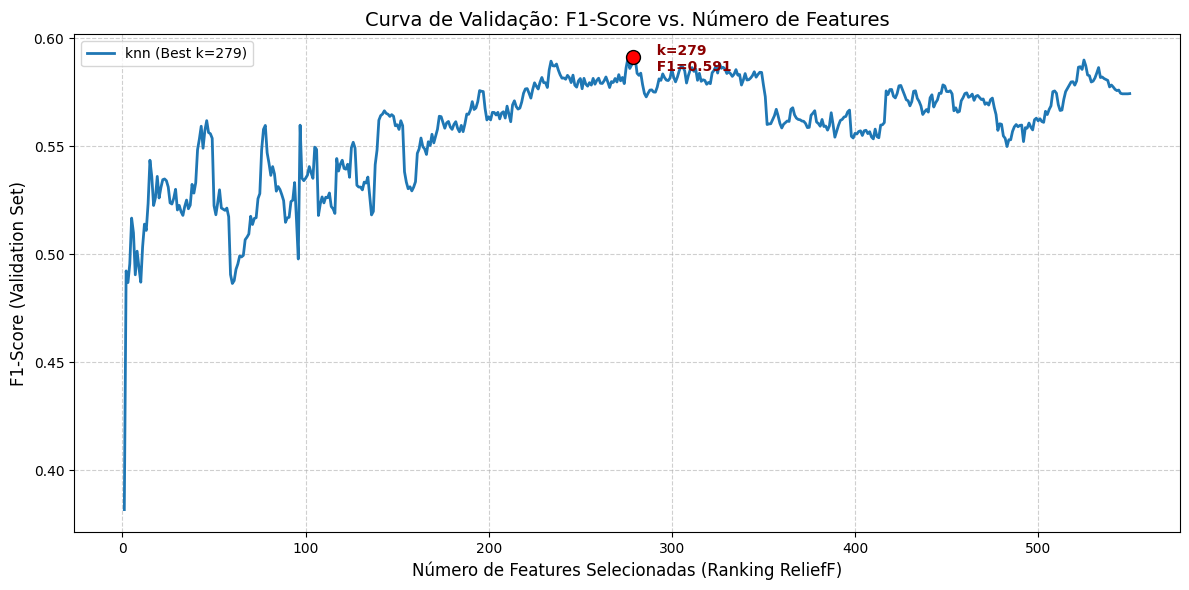

In [7]:
import matplotlib.pyplot as plt

def plot_feature_selection_elbow(models_results):
    plt.figure(figsize=(12, 6))
    
    for model_res in models_results:
        # Extrair os dados de validação
        val_data = model_res['validation']
        # 'test' contém o dicionário final com o nome e melhor k
        name = model_res['test']['model']
        
        # Criar listas de K e F1
        ks = [entry['k_features'] for entry in val_data]
        f1s = [entry['F1'] for entry in val_data]
        
        # O melhor k e F1 para marcar no gráfico
        best_k = model_res['test']['k_features']
        # Procuramos o F1 correspondente ao melhor_k na lista de validação
        best_f1 = next(item['F1'] for item in val_data if item['k_features'] == best_k)
        
        # CORREÇÃO AQUI: apenas um 'f'
        plt.plot(ks, f1s, label=f"{name} (Best k={best_k})", linewidth=2)
        
        # Marcar o ponto de "cotovelo" (elbow)
        plt.scatter(best_k, best_f1, color='red', s=100, zorder=5, edgecolors='black')
        plt.annotate(f'  k={best_k}\n  F1={best_f1:.3f}', 
                     (best_k, best_f1), 
                     textcoords="offset points", 
                     xytext=(10,-10), 
                     ha='left', 
                     fontsize=10, 
                     fontweight='bold',
                     color='darkred')

    plt.title('Curva de Validação: F1-Score vs. Número de Features', fontsize=14)
    plt.xlabel('Número de Features Selecionadas (Ranking ReliefF)', fontsize=12)
    plt.ylabel('F1-Score (Validation Set)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Chamar a função
plot_feature_selection_elbow(models_results)

In [18]:
hyper_data = models_results[0]['hyperparameter_search']
df_hyper = pd.DataFrame(hyper_data)
df_params = df_hyper['params'].apply(pd.Series)
df_final = pd.concat([df_params, df_hyper.drop(columns=['params'])], axis=1)
df_final = df_final.sort_values(by="validation_f1", ascending=False)
display(df_final)

n_neighbors  validation_f1  k_used
2            5       0.591355     279
3            7       0.590961     279
5           11       0.589460     279
7           15       0.589138     279
6           13       0.585371     279
4            9       0.584127     279
1            3       0.566307     279
0            1       0.556138     279